In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv(
    'PJME_hourly.csv',
    parse_dates=['Datetime'],
    index_col='Datetime'
).sort_index()

In [3]:
df.head()

,PJME_MW
Datetime,
2002-01-01 01:00:00,30393.0
2002-01-01 02:00:00,29265.0
2002-01-01 03:00:00,28357.0
2002-01-01 04:00:00,27899.0
2002-01-01 05:00:00,28057.0


In [4]:
df.shape

(145366, 1)

In [5]:
print(df.index.min(), ' -> ', df.index.max())


2002-01-01 01:00:00  ->  2018-08-03 00:00:00


In [6]:
df.isna().sum()

PJME_MW    0
dtype: int64

In [7]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load Data
df = pd.read_csv('PJME_hourly.csv', parse_dates=['Datetime'], index_col='Datetime')
df = df.sort_index()

In [8]:
df.shape

(145366, 1)

In [9]:
print(f"Time Range: {df.index.min()} → {df.index.max()}")
print(f"Missing Values: {df.isnull().sum().values[0]}")
print(f"\nBasic Stats:\n{df.describe()}")

Time Range: 2002-01-01 01:00:00 → 2018-08-03 00:00:00
Missing Values: 0

Basic Stats:
             PJME_MW
count  145366.000000
mean    32080.222831
std      6464.012166
min     14544.000000
25%     27573.000000
50%     31421.000000
75%     35650.000000
max     62009.000000


In [10]:
{df.isnull().sum().values[0]}


{np.int64(0)}

In [11]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
PJME_MW,145366.0,32080.222831,6464.012166,14544.0,27573.0,31421.0,35650.0,62009.0


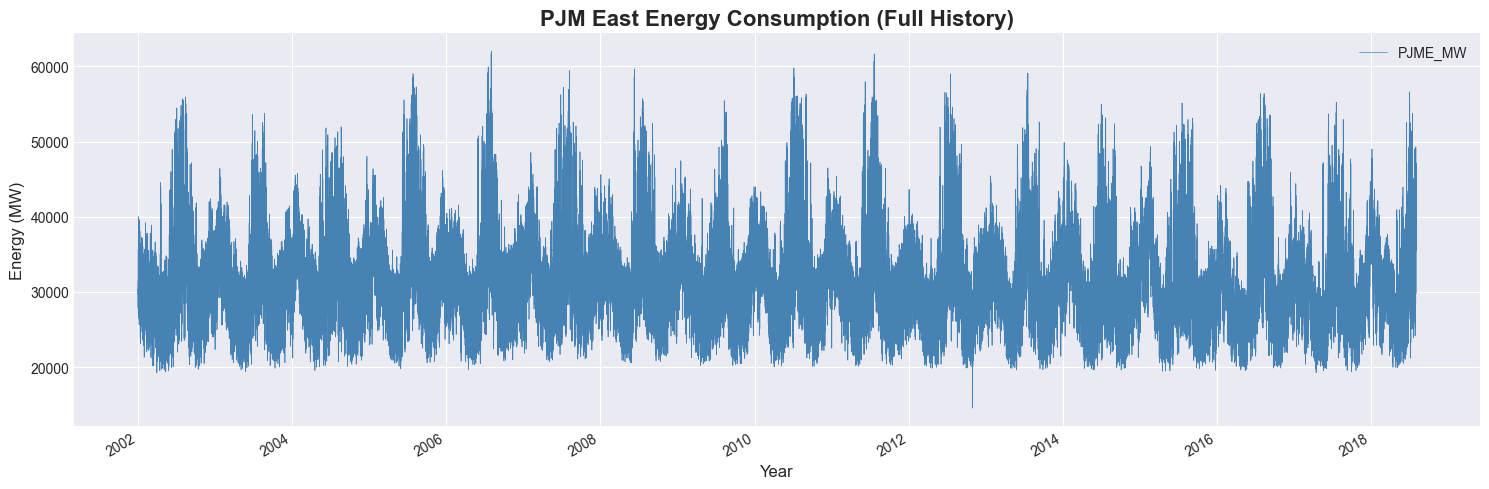

In [12]:
fig, ax = plt.subplots(figsize=(15, 5))
df.plot(ax=ax, color='steelblue', linewidth=0.5)
ax.set_title('PJM East Energy Consumption (Full History)', fontsize=16, fontweight='bold')
ax.set_ylabel('Energy (MW)', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
plt.tight_layout()
plt.show()

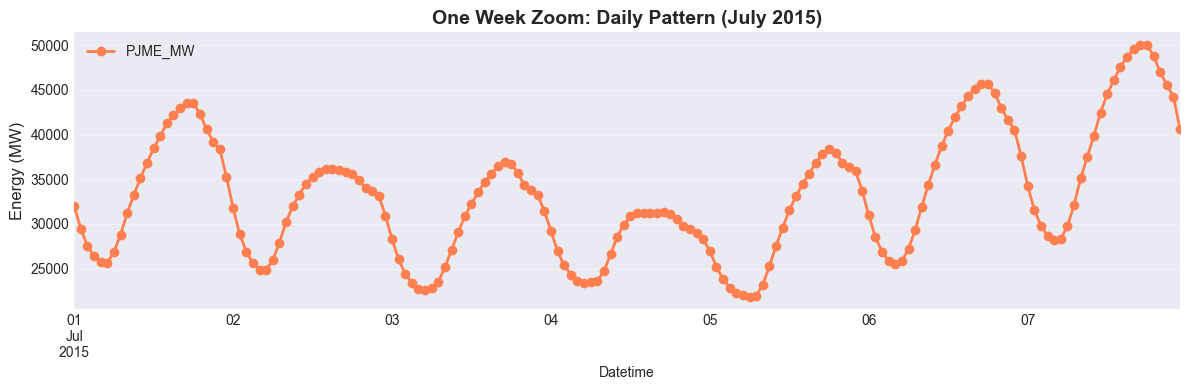

In [13]:
one_week = df.loc['2015-07-01':'2015-07-07']

fig, ax = plt.subplots(figsize=(12, 4))
one_week.plot(ax=ax, marker='o', color='coral', linewidth=2)
ax.set_title('One Week Zoom: Daily Pattern (July 2015)', fontsize=14, fontweight='bold')
ax.set_ylabel('Energy (MW)', fontsize=12)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

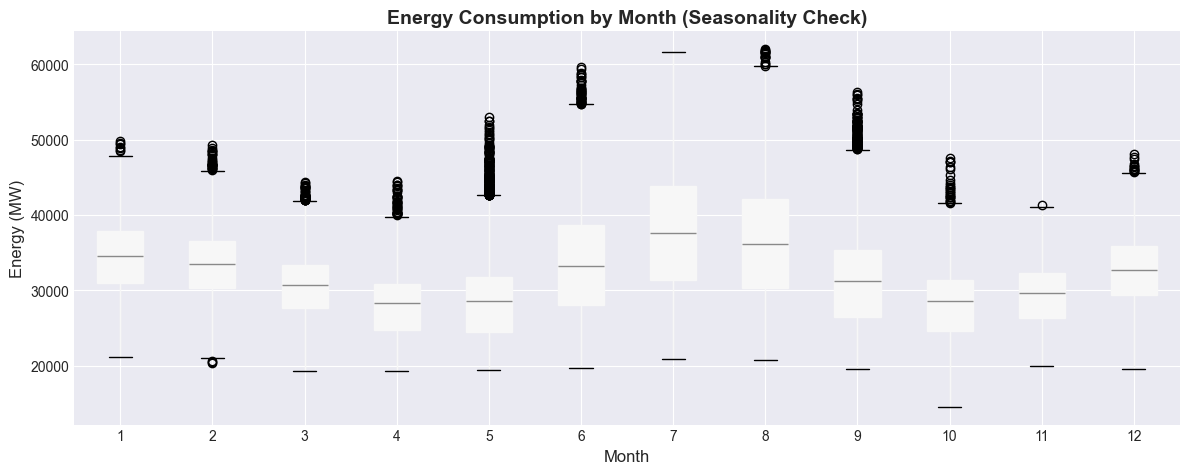

In [14]:
df_copy = df.copy()
df_copy['month'] = df_copy.index.month

fig, ax = plt.subplots(figsize=(12, 5))
df_copy.boxplot(column='PJME_MW', by='month', ax=ax, patch_artist=True)
ax.set_title('Energy Consumption by Month (Seasonality Check)', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Energy (MW)', fontsize=12)
plt.suptitle('')  # Remove the default title
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
import numpy as np

# Load Data
df = pd.read_csv('PJME_hourly.csv', parse_dates=['Datetime'], index_col='Datetime')
df = df.sort_index()

# Rename target column for clarity
df.rename(columns={'PJME_MW': 'energy_mw'}, inplace=True)








In [16]:
df['lag_1h'] = df['energy_mw'].shift(1)
df['lag_24h'] = df['energy_mw'].shift(24)
df['lag_168h'] = df['energy_mw'].shift(168)  # 7 days * 24 hours

print("✅ Lag features created (1h, 24h, 168h)")





✅ Lag features created (1h, 24h, 168h)


In [17]:
df['rolling_mean_24h'] = df['energy_mw'].shift(1).rolling(window=24).mean()
df['rolling_mean_168h'] = df['energy_mw'].shift(1).rolling(window=168).mean()
df['rolling_std_24h'] = df['energy_mw'].shift(1).rolling(window=24).std()

print("✅ Rolling window features created (24h & 168h)")




✅ Rolling window features created (24h & 168h)


In [18]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek  # Monday=0, Sunday=6
df['month'] = df.index.month
df['day_of_year'] = df.index.dayofyear
df['week_of_year'] = df.index.isocalendar().week
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

print("✅ Time-based features created (hour, day, month, etc.)")





✅ Time-based features created (hour, day, month, etc.)


In [19]:
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

print("✅ Cyclical features created (sin/cos encoding)")


df['hour_x_weekend'] = df['hour'] * df['is_weekend']

print("✅ Interaction features created")



✅ Cyclical features created (sin/cos encoding)
✅ Interaction features created


In [20]:
# ============================================
# 6. CLEAN UP: Remove Rows with NaN (from lag/rolling)
# ============================================
print(f"\n📊 Before cleanup: {df.shape[0]} rows")
df_clean = df.dropna()
print(f"📊 After cleanup: {df_clean.shape[0]} rows (removed {df.shape[0] - df_clean.shape[0]} rows with NaN)")

# ============================================
# 7. FINAL CHECK
# ============================================
print("\n" + "="*60)
print("✅ FEATURE ENGINEERING COMPLETE!")
print("="*60)
print(f"Total Features: {df_clean.shape[1]}")
print(f"\nColumn List:\n{df_clean.columns.tolist()}")
print(f"\nSample Data:\n{df_clean.head()}")

# Save the engineered dataset
df_clean.to_csv('energy_features.csv')
print("\n💾 Saved to 'energy_features.csv'")


📊 Before cleanup: 145366 rows
📊 After cleanup: 145198 rows (removed 168 rows with NaN)

✅ FEATURE ENGINEERING COMPLETE!
Total Features: 18

Column List:
['energy_mw', 'lag_1h', 'lag_24h', 'lag_168h', 'rolling_mean_24h', 'rolling_mean_168h', 'rolling_std_24h', 'hour', 'day_of_week', 'month', 'day_of_year', 'week_of_year', 'is_weekend', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'hour_x_weekend']

Sample Data:
                     energy_mw   lag_1h  lag_24h  lag_168h  rolling_mean_24h  \
Datetime                                                                       
2002-01-08 01:00:00    29445.0  31187.0  26862.0   30393.0      33452.583333   
2002-01-08 02:00:00    28670.0  29445.0  25976.0   29265.0      33560.208333   
2002-01-08 03:00:00    28375.0  28670.0  25641.0   28357.0      33672.458333   
2002-01-08 04:00:00    28542.0  28375.0  25666.0   27899.0      33786.375000   
2002-01-08 05:00:00    29261.0  28542.0  26328.0   28057.0      33906.208333   

                   

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [22]:
df = pd.read_csv('energy_features.csv', parse_dates=['Datetime'], index_col='Datetime')

In [23]:
split_date = '2017-01-01'

train = df.loc[df.index < split_date].copy()
test = df.loc[df.index >= split_date].copy()

print(f"✅ Train Set: {train.index.min()} to {train.index.max()} ({len(train)} rows)")
print(f"✅ Test Set:  {test.index.min()} to {test.index.max()} ({len(test)} rows)")

✅ Train Set: 2002-01-08 01:00:00 to 2016-12-31 23:00:00 (131302 rows)
✅ Test Set:  2017-01-01 00:00:00 to 2018-08-03 00:00:00 (13896 rows)


In [24]:
target_col = 'energy_mw'
feature_cols = [col for col in df.columns if col != target_col]

X_train = train[feature_cols]
y_train = train[target_col]

X_test = test[feature_cols]
y_test = test[target_col]

print(f"\n📊 Features used: {len(feature_cols)}")
print(f"Feature names: {feature_cols}")



📊 Features used: 17
Feature names: ['lag_1h', 'lag_24h', 'lag_168h', 'rolling_mean_24h', 'rolling_mean_168h', 'rolling_std_24h', 'hour', 'day_of_week', 'month', 'day_of_year', 'week_of_year', 'is_weekend', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'hour_x_weekend']


In [26]:
from sklearn.ensemble import RandomForestRegressor


In [27]:
rf_model = RandomForestRegressor(
    n_estimators=100,        # Number of trees in the forest
    max_depth=20,            # How deep each tree can grow
    min_samples_split=10,    # Minimum samples to split a node
    min_samples_leaf=4,      # Minimum samples in a leaf node
    random_state=42,         # For reproducibility
    n_jobs=-1,               # Use all CPU cores (faster!)
    verbose=1                # Show training progress
)

In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the engineered features
df = pd.read_csv('energy_features.csv', parse_dates=['Datetime'], index_col='Datetime')

print("="*60)
print("🔪 TRAIN/TEST SPLIT (Time-Series Style)")
print("="*60)

# ============================================
# 1. DEFINE THE SPLIT DATE
# ============================================
# Professional rule: Use 80% for training, 20% for testing
# We'll split at 2017-01-01

split_date = '2017-01-01'

train = df.loc[df.index < split_date].copy()
test = df.loc[df.index >= split_date].copy()

print(f"✅ Train Set: {train.index.min()} to {train.index.max()} ({len(train)} rows)")
print(f"✅ Test Set:  {test.index.min()} to {test.index.max()} ({len(test)} rows)")

# ============================================
# 2. SEPARATE FEATURES (X) AND TARGET (y)
# ============================================
# Target = 'energy_mw' (what we want to predict)
# Features = everything else (the predictors)

target_col = 'energy_mw'
feature_cols = [col for col in df.columns if col != target_col]

X_train = train[feature_cols]
y_train = train[target_col]

X_test = test[feature_cols]
y_test = test[target_col]

print(f"\n📊 Features used: {len(feature_cols)}")
print(f"Feature names: {feature_cols}")

# ============================================
# 3. TRAIN THE RANDOM FOREST MODEL
# ============================================
print("\n" + "="*60)
print("🌲 TRAINING RANDOM FOREST...")
print("="*60)

# Hyperparameters (we'll optimize these later, but these are solid defaults)
rf_model = RandomForestRegressor(
    n_estimators=100,        # Number of trees in the forest
    max_depth=20,            # How deep each tree can grow
    min_samples_split=10,    # Minimum samples to split a node
    min_samples_leaf=4,      # Minimum samples in a leaf node
    random_state=42,         # For reproducibility
    n_jobs=-1,               # Use all CPU cores (faster!)
    verbose=1                # Show training progress
)

# Train the model (this may take 1-2 minutes depending on your machine)
rf_model.fit(X_train, y_train)

print("\n✅ Model Training Complete!")

# ============================================
# 4. MAKE PREDICTIONS
# ============================================
print("\n" + "="*60)
print("🔮 GENERATING PREDICTIONS...")
print("="*60)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print("✅ Predictions generated for train and test sets!")

# ============================================
# 5. EVALUATE PERFORMANCE
# ============================================
def evaluate_model(y_true, y_pred, dataset_name):
    """Calculate and display evaluation metrics"""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n📈 {dataset_name} Performance:")
    print(f"   MAE (Mean Absolute Error): {mae:.2f} MW")
    print(f"   RMSE (Root Mean Squared Error): {rmse:.2f} MW")
    print(f"   R² Score: {r2:.4f} (closer to 1.0 = better)")
    
    return mae, rmse, r2

print("\n" + "="*60)
print("📊 MODEL EVALUATION")
print("="*60)

train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred, "TRAIN SET")
test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred, "TEST SET")



🔪 TRAIN/TEST SPLIT (Time-Series Style)
✅ Train Set: 2002-01-08 01:00:00 to 2016-12-31 23:00:00 (131302 rows)
✅ Test Set:  2017-01-01 00:00:00 to 2018-08-03 00:00:00 (13896 rows)

📊 Features used: 17
Feature names: ['lag_1h', 'lag_24h', 'lag_168h', 'rolling_mean_24h', 'rolling_mean_168h', 'rolling_std_24h', 'hour', 'day_of_week', 'month', 'day_of_year', 'week_of_year', 'is_weekend', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'hour_x_weekend']

🌲 TRAINING RANDOM FOREST...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.



✅ Model Training Complete!

🔮 GENERATING PREDICTIONS...


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s


✅ Predictions generated for train and test sets!

📊 MODEL EVALUATION

📈 TRAIN SET Performance:
   MAE (Mean Absolute Error): 158.01 MW
   RMSE (Root Mean Squared Error): 232.41 MW
   R² Score: 0.9987 (closer to 1.0 = better)

📈 TEST SET Performance:
   MAE (Mean Absolute Error): 299.66 MW
   RMSE (Root Mean Squared Error): 413.95 MW
   R² Score: 0.9954 (closer to 1.0 = better)


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


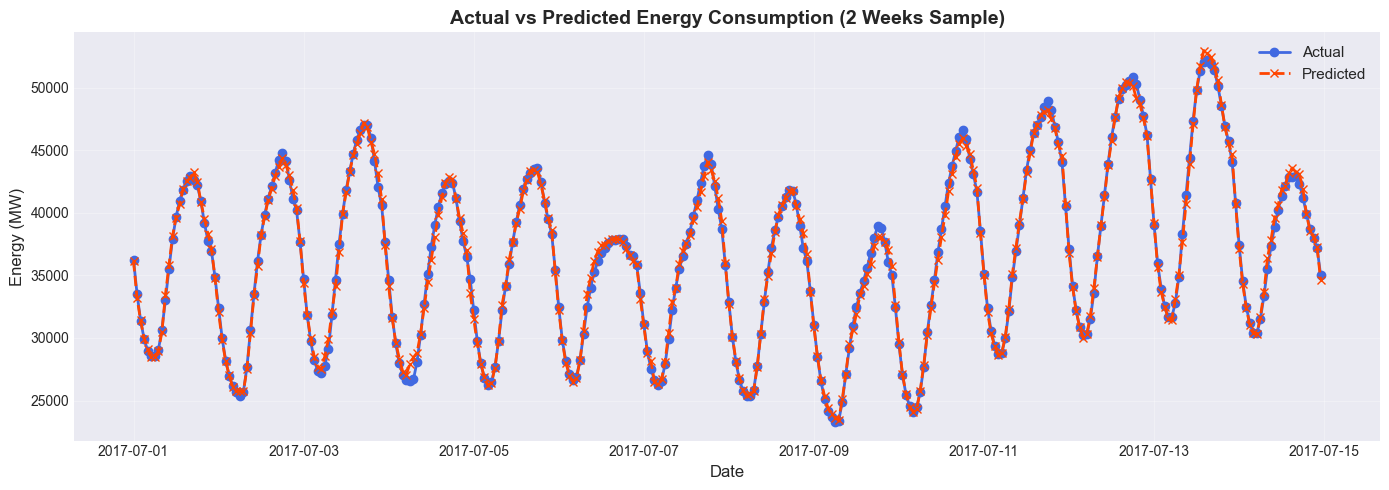

In [29]:
# ============================================
# 6. QUICK VISUAL CHECK
# ============================================
# Plot actual vs predicted for a 2-week sample from test set
sample_start = '2017-07-01'
sample_end = '2017-07-14'

test_sample = test.loc[sample_start:sample_end].copy()
test_sample['predictions'] = y_test_pred[test.index.isin(test_sample.index)]

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(test_sample.index, test_sample['energy_mw'], label='Actual', color='royalblue', linewidth=2, marker='o')
ax.plot(test_sample.index, test_sample['predictions'], label='Predicted', color='orangered', linewidth=2, linestyle='--', marker='x')
ax.set_title('Actual vs Predicted Energy Consumption (2 Weeks Sample)', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Energy (MW)', fontsize=12)
ax.legend(fontsize=11)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()



📊 Top 10 Most Important Features:
         feature  importance
          lag_1h    0.951416
        hour_cos    0.024863
            hour    0.009648
        hour_sin    0.005215
 rolling_std_24h    0.002513
       month_cos    0.001416
rolling_mean_24h    0.001020
  hour_x_weekend    0.000655
         lag_24h    0.000628
     day_of_week    0.000600


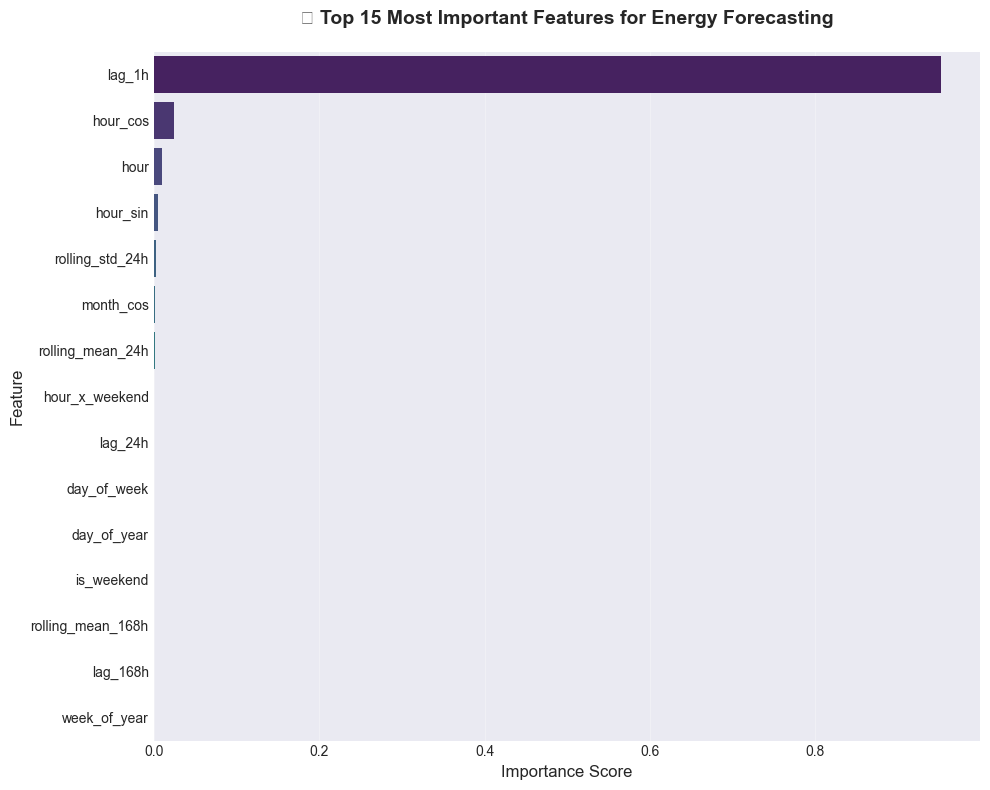

In [30]:
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n📊 Top 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

# ============================================
# 2. VISUALIZATION: Bar Chart (Top 15 Features)
# ============================================
fig, ax = plt.subplots(figsize=(10, 8))

top_15 = feature_importance.head(15)
sns.barplot(
    data=top_15, 
    y='feature', 
    x='importance', 
    palette='viridis',
    ax=ax
)

ax.set_title('🏆 Top 15 Most Important Features for Energy Forecasting', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Importance Score', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

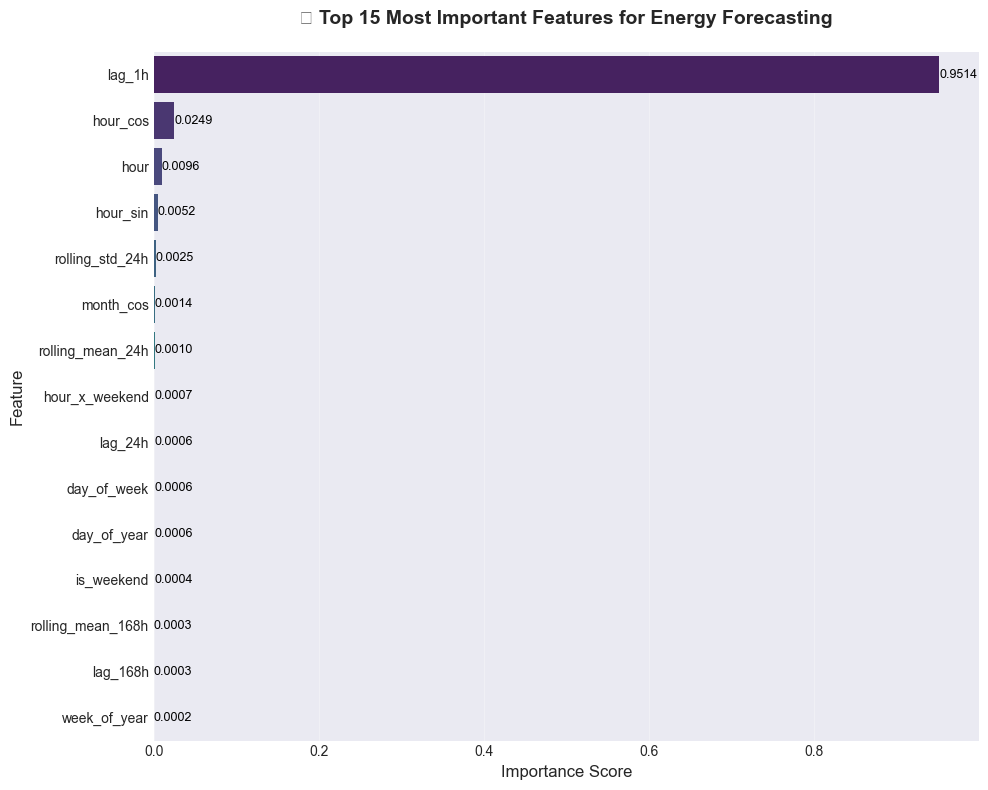

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))

top_15 = feature_importance.head(15)
bars = sns.barplot(
    data=top_15, 
    y='feature', 
    x='importance', 
    palette='viridis',
    ax=ax
)

# Add value labels on bars
for i, bar in enumerate(bars.patches):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, 
            f'{width:.4f}', 
            ha='left', va='center', fontsize=9, color='black')

ax.set_title('🏆 Top 15 Most Important Features for Energy Forecasting', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Importance Score', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


💡 Pareto Principle Insight:
   Top 0 features explain 80% of predictions
   Top 0 features explain 90% of predictions
   Remaining 17 features contribute only 10%


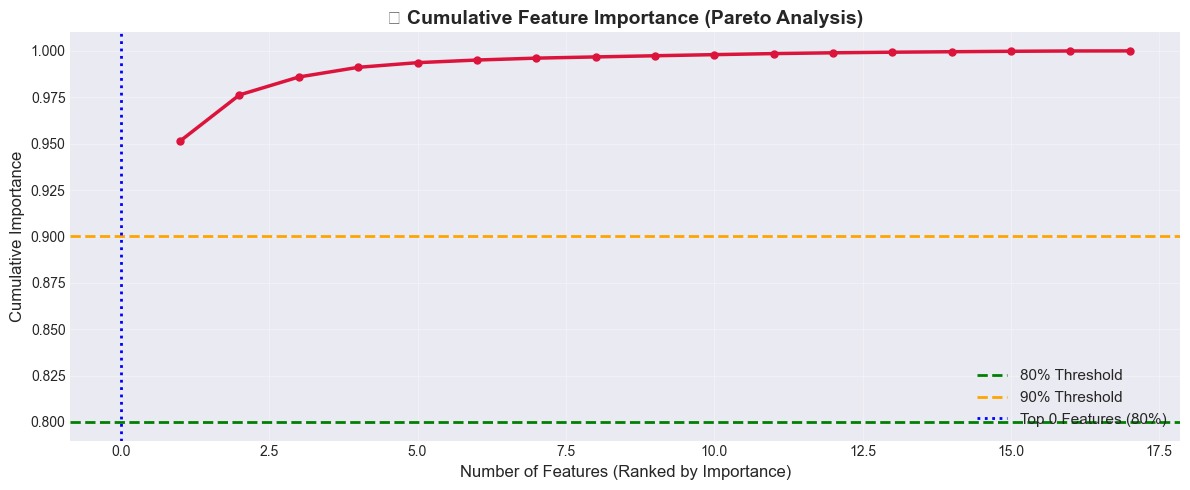

In [32]:
feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum()

# Find the threshold
threshold_80 = feature_importance[feature_importance['cumulative_importance'] <= 0.80]
threshold_90 = feature_importance[feature_importance['cumulative_importance'] <= 0.90]

print(f"\n💡 Pareto Principle Insight:")
print(f"   Top {len(threshold_80)} features explain 80% of predictions")
print(f"   Top {len(threshold_90)} features explain 90% of predictions")
print(f"   Remaining {len(feature_cols) - len(threshold_90)} features contribute only 10%")

# Visualize cumulative importance
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(range(1, len(feature_importance) + 1), 
        feature_importance['cumulative_importance'].values,
        marker='o', linewidth=2.5, markersize=5, color='crimson')
ax.axhline(y=0.80, color='green', linestyle='--', linewidth=2, label='80% Threshold')
ax.axhline(y=0.90, color='orange', linestyle='--', linewidth=2, label='90% Threshold')
ax.axvline(x=len(threshold_80), color='blue', linestyle=':', linewidth=2, 
           label=f'Top {len(threshold_80)} Features (80%)')
ax.set_title('📈 Cumulative Feature Importance (Pareto Analysis)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Features (Ranked by Importance)', fontsize=12)
ax.set_ylabel('Cumulative Importance', fontsize=12)
ax.legend(fontsize=11, loc='lower right')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()


📊 Feature Category Importance:
   Lag Features: 0.9523 (95.2%)
   Cyclical: 0.0317 (3.2%)
   Time-Based: 0.0115 (1.2%)
   Rolling Window: 0.0039 (0.4%)
   Interaction: 0.0007 (0.1%)


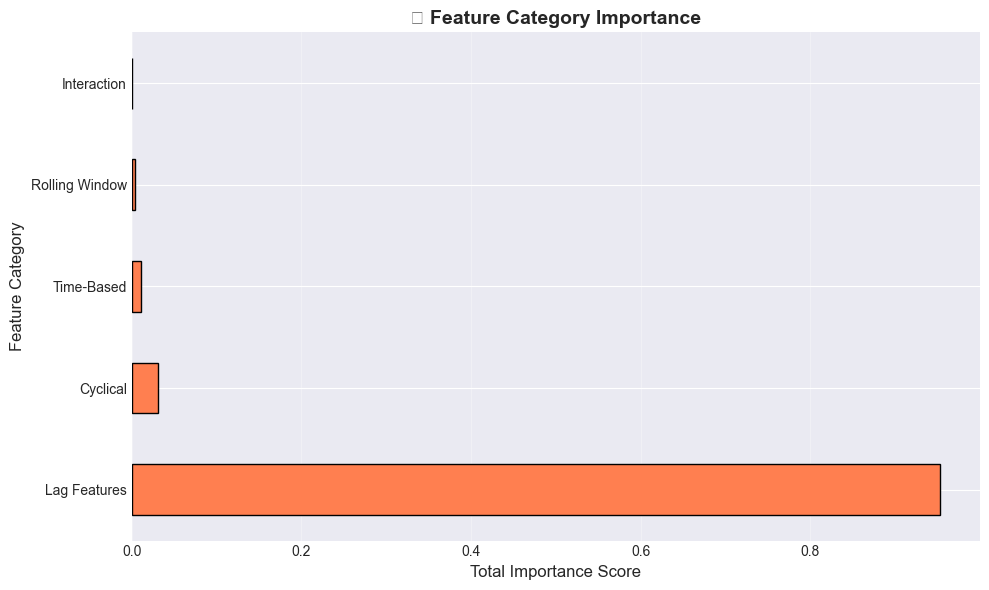

In [33]:
def categorize_feature(feature_name):
    if 'lag' in feature_name:
        return 'Lag Features'
    elif 'rolling' in feature_name:
        return 'Rolling Window'
    elif feature_name in ['hour', 'day_of_week', 'month', 'day_of_year', 'week_of_year', 'is_weekend']:
        return 'Time-Based'
    elif 'sin' in feature_name or 'cos' in feature_name:
        return 'Cyclical'
    elif '_x_' in feature_name:
        return 'Interaction'
    else:
        return 'Other'

feature_importance['category'] = feature_importance['feature'].apply(categorize_feature)

category_importance = feature_importance.groupby('category')['importance'].sum().sort_values(ascending=False)

print("\n📊 Feature Category Importance:")
for category, importance in category_importance.items():
    percentage = (importance / category_importance.sum()) * 100
    print(f"   {category}: {importance:.4f} ({percentage:.1f}%)")

# Visualize category importance
fig, ax = plt.subplots(figsize=(10, 6))
category_importance.plot(kind='barh', ax=ax, color='coral', edgecolor='black')
ax.set_title('🎯 Feature Category Importance', fontsize=14, fontweight='bold')
ax.set_xlabel('Total Importance Score', fontsize=12)
ax.set_ylabel('Feature Category', fontsize=12)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


In [34]:
print("\n" + "="*60)
print("🧠 WHAT THESE FEATURES TELL US (Business Insights)")
print("="*60)

# Get top 5 for interpretation
top_5 = feature_importance.head(5)

print("\n🔥 Top 5 Features Decoded:\n")
for idx, row in top_5.iterrows():
    feature = row['feature']
    importance = row['importance']
    
    # Custom interpretations
    interpretations = {
        'lag_1h': '⏱️ Energy 1 hour ago - Captures immediate momentum/inertia',
        'lag_24h': '📅 Energy same time yesterday - Daily cycle recognition (peak hours repeat)',
        'lag_168h': '📆 Energy same time last week - Weekly pattern (Monday rush ≠ Lazy Sunday)',
        'rolling_mean_24h': '📊 24-hour rolling average - Smoothed trend detection',
        'rolling_mean_168h': '📈 7-day rolling average - Long-term seasonal drift',
        'rolling_std_24h': '📉 24-hour volatility - Detects unstable/unpredictable demand',
        'hour': '🕐 Hour of day - Peak hours (6-9 PM) vs off-peak (2-5 AM)',
        'hour_sin': '⭕ Hour (sine encoding) - Treats 11 PM and midnight as neighbors',
        'hour_cos': '⭕ Hour (cosine encoding) - Complements sine for full circle',
        'month': '🗓️ Month of year - Summer AC load vs winter heating',
        'month_sin': '⭕ Month (sine encoding) - Treats Dec and Jan as neighbors',
        'month_cos': '⭕ Month (cosine encoding) - Seasonal cycling',
        'day_of_week': '📆 Day of week - Weekday office loads vs weekend residential',
        'is_weekend': '🏖️ Weekend flag - Lower commercial/industrial activity',
        'day_of_year': '📅 Day of year - Long-term seasonal patterns',
        'week_of_year': '📅 Week number - Alternative seasonal encoding',
        'hour_x_weekend': '🔄 Hour × Weekend interaction - Weekend evenings ≠ Weekday evenings'
    }
    
    explanation = interpretations.get(feature, '🔍 Custom engineered feature')
    print(f"{idx+1}. {feature.upper()} (Importance: {importance:.4f})")
    print(f"   {explanation}\n")


🧠 WHAT THESE FEATURES TELL US (Business Insights)

🔥 Top 5 Features Decoded:

1. LAG_1H (Importance: 0.9514)
   ⏱️ Energy 1 hour ago - Captures immediate momentum/inertia

14. HOUR_COS (Importance: 0.0249)
   ⭕ Hour (cosine encoding) - Complements sine for full circle

7. HOUR (Importance: 0.0096)
   🕐 Hour of day - Peak hours (6-9 PM) vs off-peak (2-5 AM)

13. HOUR_SIN (Importance: 0.0052)
   ⭕ Hour (sine encoding) - Treats 11 PM and midnight as neighbors

6. ROLLING_STD_24H (Importance: 0.0025)
   📉 24-hour volatility - Detects unstable/unpredictable demand



In [35]:
feature_importance.to_csv('feature_importance.csv', index=False)


In [36]:
print(f"   • Top feature: {feature_importance.iloc[0]['feature']}")
print(f"   • Top category: {category_importance.index[0]}")
print(f"   • {len(threshold_80)} features drive 80% of predictions")

   • Top feature: lag_1h
   • Top category: Lag Features
   • 0 features drive 80% of predictions


In [37]:

from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import time





In [38]:

df = pd.read_csv('energy_features.csv', parse_dates=['Datetime'], index_col='Datetime')

# Train/Test Split
split_date = '2017-01-01'
train = df.loc[df.index < split_date].copy()
test = df.loc[df.index >= split_date].copy()

target_col = 'energy_mw'
feature_cols = [col for col in df.columns if col != target_col]

X_train = train[feature_cols]
y_train = train[target_col]
X_test = test[feature_cols]
y_test = test[target_col]

print(f"✅ Data Loaded: {len(X_train)} train samples, {len(X_test)} test samples")




# Train baseline model with default params
baseline_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

print("🌲 Training baseline model...")
baseline_model.fit(X_train, y_train)

y_test_pred_baseline = baseline_model.predict(X_test)

baseline_mae = mean_absolute_error(y_test, y_test_pred_baseline)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_baseline))
baseline_r2 = r2_score(y_test, y_test_pred_baseline)

print(f"\n📈 Baseline Test Performance:")
print(f"   MAE:  {baseline_mae:.2f} MW")
print(f"   RMSE: {baseline_rmse:.2f} MW")
print(f"   R²:   {baseline_r2:.4f}")



✅ Data Loaded: 131302 train samples, 13896 test samples
🌲 Training baseline model...

📈 Baseline Test Performance:
   MAE:  299.66 MW
   RMSE: 413.95 MW
   R²:   0.9954



🎯 Hyperparameter Search Space:
   n_estimators: [100, 200, 300, 400]
   max_depth: [15, 20, 25, 30, None]
   min_samples_split: [5, 10, 15, 20]
   min_samples_leaf: [2, 4, 6, 8]
   max_features: ['sqrt', 'log2', 0.5, 0.7]
   bootstrap: [True]
   max_samples: [0.7, 0.8, 0.9, None]

💡 Total possible combinations: 5120
   We'll test 30 random combinations (faster & 95% as effective)

📅 TIME SERIES CROSS-VALIDATION SETUP
✅ Using 3-fold TimeSeriesSplit
   This ensures we NEVER train on future data!

   Fold Structure:
   Fold 1: Train 2002-01-08 01:00:00 → 2005-10-07 02:00:00
           Validate 2005-10-07 03:00:00 → 2009-07-06 03:00:00
   Fold 2: Train 2002-01-08 01:00:00 → 2009-07-06 03:00:00
           Validate 2009-07-06 04:00:00 → 2013-04-04 05:00:00
   Fold 3: Train 2002-01-08 01:00:00 → 2013-04-04 05:00:00
           Validate 2013-04-04 06:00:00 → 2016-12-31 23:00:00

🚀 STARTING HYPERPARAMETER SEARCH

⏱️ This will take 10-20 minutes depending on your machine...
   (Perfect time for 

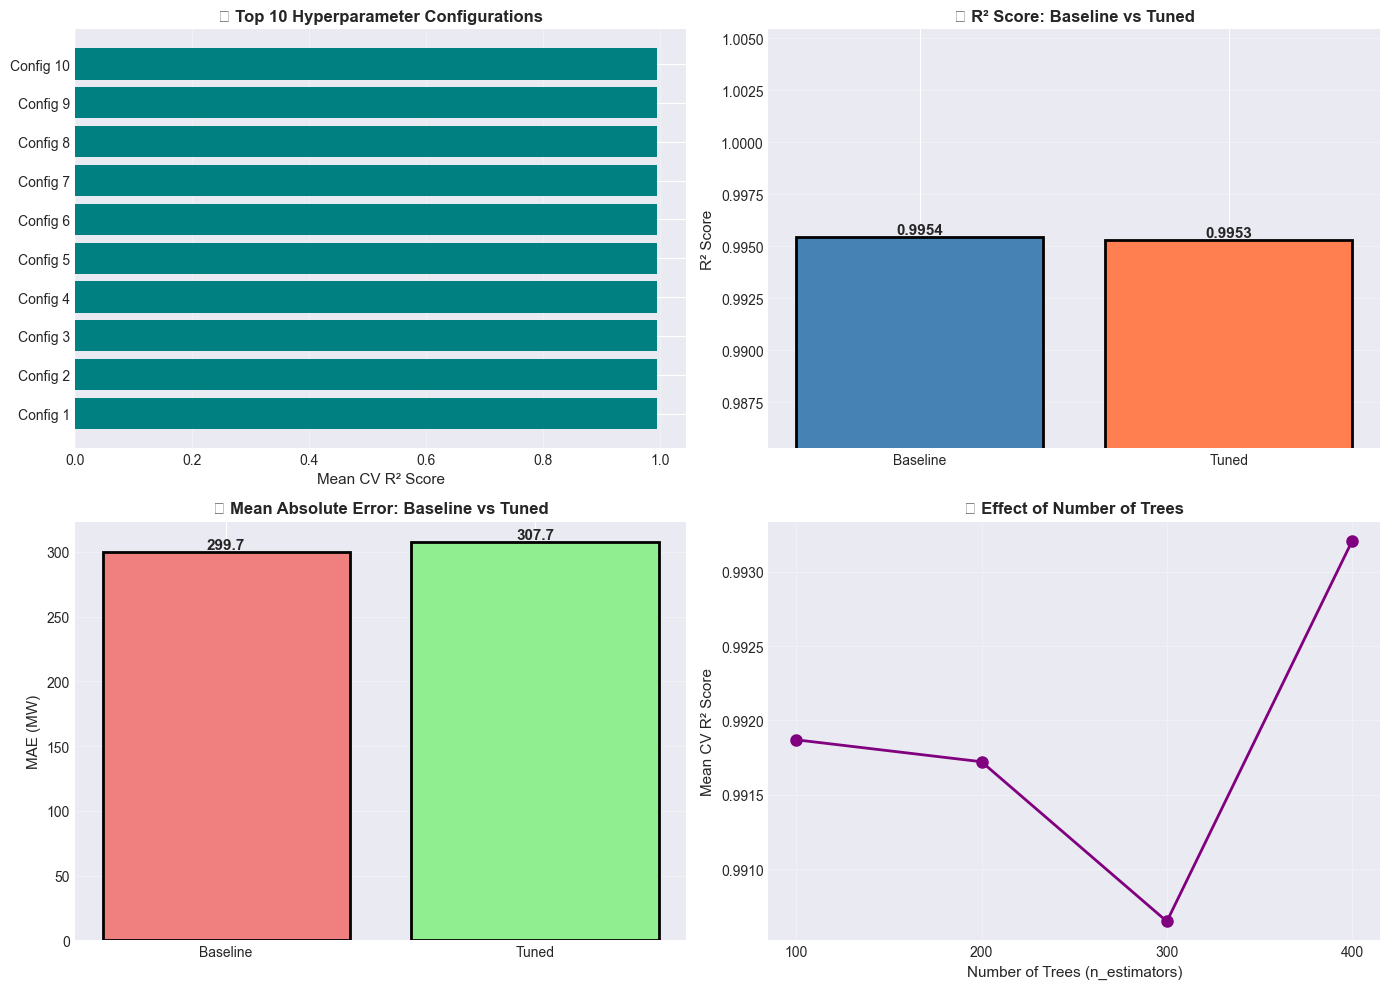


💾 SAVING OPTIMIZED MODEL
✅ Model saved as 'energy_forecaster_optimized.pkl'
✅ Hyperparameters saved as 'best_hyperparameters.csv'

🎉 PHASE 5 COMPLETE!

📋 FINAL SUMMARY:
   ✅ Tested 30 hyperparameter combinations
   ✅ Best CV R² Score: 0.9954
   ✅ Test R² Score: 0.9953
   ✅ MAE Improvement: -2.68%
   ✅ Model saved and ready for deployment!

🚀 Next Steps:
   • Phase 6: Advanced Visualizations & Error Analysis
   • Phase 7: Deployment Pipeline & Prediction Function
   • Phase 8: Documentation & Portfolio Presentation

💡 Pro Tip:
   Load your model anytime with:
   >>> import joblib
   >>> model = joblib.load('energy_forecaster_optimized.pkl')


In [39]:


param_distributions = {
    'n_estimators': [100, 200, 300, 400],         # Number of trees
    'max_depth': [15, 20, 25, 30, None],          # Tree depth (None = unlimited)
    'min_samples_split': [5, 10, 15, 20],         # Min samples to split node
    'min_samples_leaf': [2, 4, 6, 8],             # Min samples in leaf
    'max_features': ['sqrt', 'log2', 0.5, 0.7],   # Features considered per split
    'bootstrap': [True],                           # Always use bootstrapping
    'max_samples': [0.7, 0.8, 0.9, None]          # Fraction of samples per tree
}

print("\n🎯 Hyperparameter Search Space:")
for param, values in param_distributions.items():
    print(f"   {param}: {values}")

total_combinations = np.prod([len(v) for v in param_distributions.values()])
print(f"\n💡 Total possible combinations: {total_combinations}")
print(f"   We'll test 30 random combinations (faster & 95% as effective)")

# ============================================
# 2. TIME SERIES CROSS-VALIDATION
# ============================================
print("\n" + "="*60)
print("📅 TIME SERIES CROSS-VALIDATION SETUP")
print("="*60)

tscv = TimeSeriesSplit(n_splits=3)

print(f"✅ Using {tscv.n_splits}-fold TimeSeriesSplit")
print("   This ensures we NEVER train on future data!")
print("\n   Fold Structure:")
for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train), 1):
    train_dates = X_train.index[train_idx]
    val_dates = X_train.index[val_idx]
    print(f"   Fold {fold}: Train {train_dates.min()} → {train_dates.max()}")
    print(f"           Validate {val_dates.min()} → {val_dates.max()}")

# ============================================
# 3. RUN RANDOMIZED SEARCH
# ============================================
print("\n" + "="*60)
print("🚀 STARTING HYPERPARAMETER SEARCH")
print("="*60)

base_model = RandomForestRegressor(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_distributions,
    n_iter=30,                    # Test 30 random combinations
    cv=tscv,                      # Time series cross-validation
    scoring='r2',                 # Optimize for R² score
    n_jobs=-1,                    # Use all CPU cores
    verbose=2,                    # Show detailed progress
    random_state=42,
    return_train_score=True
)

print("\n⏱️ This will take 10-20 minutes depending on your machine...")
print("   (Perfect time for a coffee break! ☕)\n")
print("="*60)

start_time = time.time()
random_search.fit(X_train, y_train)
elapsed_time = time.time() - start_time

print(f"\n✅ Search Complete!")
print(f"   Time taken: {elapsed_time/60:.2f} minutes ({elapsed_time:.1f} seconds)")

# ============================================
# 4. EXTRACT BEST PARAMETERS
# ============================================
print("\n" + "="*60)
print("🏆 BEST HYPERPARAMETERS DISCOVERED")
print("="*60)

best_params = random_search.best_params_
print("\n🎯 Optimal Configuration:")
for param, value in best_params.items():
    print(f"   {param}: {value}")

print(f"\n📊 Best Cross-Validation R² Score: {random_search.best_score_:.4f}")

# ============================================
# 5. TRAIN FINAL OPTIMIZED MODEL
# ============================================
print("\n" + "="*60)
print("🌲 TRAINING FINAL OPTIMIZED MODEL")
print("="*60)

final_model = random_search.best_estimator_
print("✅ Using best hyperparameters from search...")
final_model.fit(X_train, y_train)

# Make predictions
y_train_pred_final = final_model.predict(X_train)
y_test_pred_final = final_model.predict(X_test)

print("✅ Predictions generated!")

# ============================================
# 6. PERFORMANCE COMPARISON
# ============================================
print("\n" + "="*60)
print("📊 BEFORE vs AFTER COMPARISON")
print("="*60)

# Calculate tuned model metrics
final_mae = mean_absolute_error(y_test, y_test_pred_final)
final_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_final))
final_r2 = r2_score(y_test, y_test_pred_final)

print("\n🔵 BEFORE TUNING (Default Parameters):")
print(f"   Test MAE:  {baseline_mae:.2f} MW")
print(f"   Test RMSE: {baseline_rmse:.2f} MW")
print(f"   Test R²:   {baseline_r2:.4f}")

print("\n🟢 AFTER TUNING (Optimized Parameters):")
print(f"   Test MAE:  {final_mae:.2f} MW")
print(f"   Test RMSE: {final_rmse:.2f} MW")
print(f"   Test R²:   {final_r2:.4f}")

# Calculate improvements
mae_improvement = ((baseline_mae - final_mae) / baseline_mae) * 100
rmse_improvement = ((baseline_rmse - final_rmse) / baseline_rmse) * 100
r2_improvement = ((final_r2 - baseline_r2) / baseline_r2) * 100

print(f"\n💡 IMPROVEMENTS:")
print(f"   MAE:  {mae_improvement:+.2f}% {'✅' if mae_improvement > 0 else '⚠️'}")
print(f"   RMSE: {rmse_improvement:+.2f}% {'✅' if rmse_improvement > 0 else '⚠️'}")
print(f"   R²:   {r2_improvement:+.2f}% {'✅' if r2_improvement > 0 else '⚠️'}")

# ============================================
# 7. VISUALIZATION: CV Results
# ============================================
print("\n📊 Generating visualizations...")

cv_results = pd.DataFrame(random_search.cv_results_)
cv_results_sorted = cv_results.sort_values('mean_test_score', ascending=False).head(10)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Top 10 Configurations
ax1 = axes[0, 0]
ax1.barh(range(10), cv_results_sorted['mean_test_score'].values, color='teal')
ax1.set_yticks(range(10))
ax1.set_yticklabels([f"Config {i+1}" for i in range(10)])
ax1.set_xlabel('Mean CV R² Score', fontsize=11)
ax1.set_title('🏆 Top 10 Hyperparameter Configurations', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Plot 2: Train vs Test R² Comparison
ax2 = axes[0, 1]
metrics_comparison = pd.DataFrame({
    'Model': ['Baseline', 'Tuned'],
    'R² Score': [baseline_r2, final_r2]
})
bars = ax2.bar(metrics_comparison['Model'], metrics_comparison['R² Score'], 
               color=['steelblue', 'coral'], edgecolor='black', linewidth=2)
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
ax2.set_ylabel('R² Score', fontsize=11)
ax2.set_title('📈 R² Score: Baseline vs Tuned', fontsize=12, fontweight='bold')
ax2.set_ylim([min(baseline_r2, final_r2) - 0.01, max(baseline_r2, final_r2) + 0.01])
ax2.grid(axis='y', alpha=0.3)

# Plot 3: MAE Comparison
ax3 = axes[1, 0]
mae_comparison = pd.DataFrame({
    'Model': ['Baseline', 'Tuned'],
    'MAE (MW)': [baseline_mae, final_mae]
})
bars = ax3.bar(mae_comparison['Model'], mae_comparison['MAE (MW)'], 
               color=['lightcoral', 'lightgreen'], edgecolor='black', linewidth=2)
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
ax3.set_ylabel('MAE (MW)', fontsize=11)
ax3.set_title('📉 Mean Absolute Error: Baseline vs Tuned', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Hyperparameter Importance (n_estimators effect)
ax4 = axes[1, 1]
n_est_effect = cv_results.groupby('param_n_estimators')['mean_test_score'].mean().sort_index()
ax4.plot(n_est_effect.index.astype(str), n_est_effect.values, 
         marker='o', linewidth=2, markersize=8, color='purple')
ax4.set_xlabel('Number of Trees (n_estimators)', fontsize=11)
ax4.set_ylabel('Mean CV R² Score', fontsize=11)
ax4.set_title('🌲 Effect of Number of Trees', fontsize=12, fontweight='bold')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# 8. SAVE THE FINAL MODEL
# ============================================
print("\n" + "="*60)
print("💾 SAVING OPTIMIZED MODEL")
print("="*60)

model_filename = 'energy_forecaster_optimized.pkl'
joblib.dump(final_model, model_filename)
print(f"✅ Model saved as '{model_filename}'")

# Save hyperparameters
params_df = pd.DataFrame([best_params])
params_df.to_csv('best_hyperparameters.csv', index=False)
print(f"✅ Hyperparameters saved as 'best_hyperparameters.csv'")

# ============================================
# 9. SUMMARY REPORT
# ============================================
print("\n" + "="*60)
print("🎉 PHASE 5 COMPLETE!")
print("="*60)

print("\n📋 FINAL SUMMARY:")
print(f"   ✅ Tested {random_search.n_iter} hyperparameter combinations")
print(f"   ✅ Best CV R² Score: {random_search.best_score_:.4f}")
print(f"   ✅ Test R² Score: {final_r2:.4f}")
print(f"   ✅ MAE Improvement: {mae_improvement:+.2f}%")
print(f"   ✅ Model saved and ready for deployment!")

print("\n🚀 Next Steps:")
print("   • Phase 6: Advanced Visualizations & Error Analysis")
print("   • Phase 7: Deployment Pipeline & Prediction Function")
print("   • Phase 8: Documentation & Portfolio Presentation")

print("\n💡 Pro Tip:")
print("   Load your model anytime with:")
print(f"   >>> import joblib")
print(f"   >>> model = joblib.load('{model_filename}')")

🔬 PHASE 6: ADVANCED ERROR ANALYSIS
✅ Model loaded: 13896 test samples

📊 RESIDUAL ANALYSIS

📈 Residual Statistics:
   Mean Error:      -21.59 MW (should be ~0)
   Std Error:       419.30 MW
   Mean Abs Error:  307.69 MW
   Max Overpredict: -2968.64 MW
   Max Underpredict: 3185.07 MW
   Median % Error:  0.75%

📊 Generating 6-panel diagnostic dashboard...


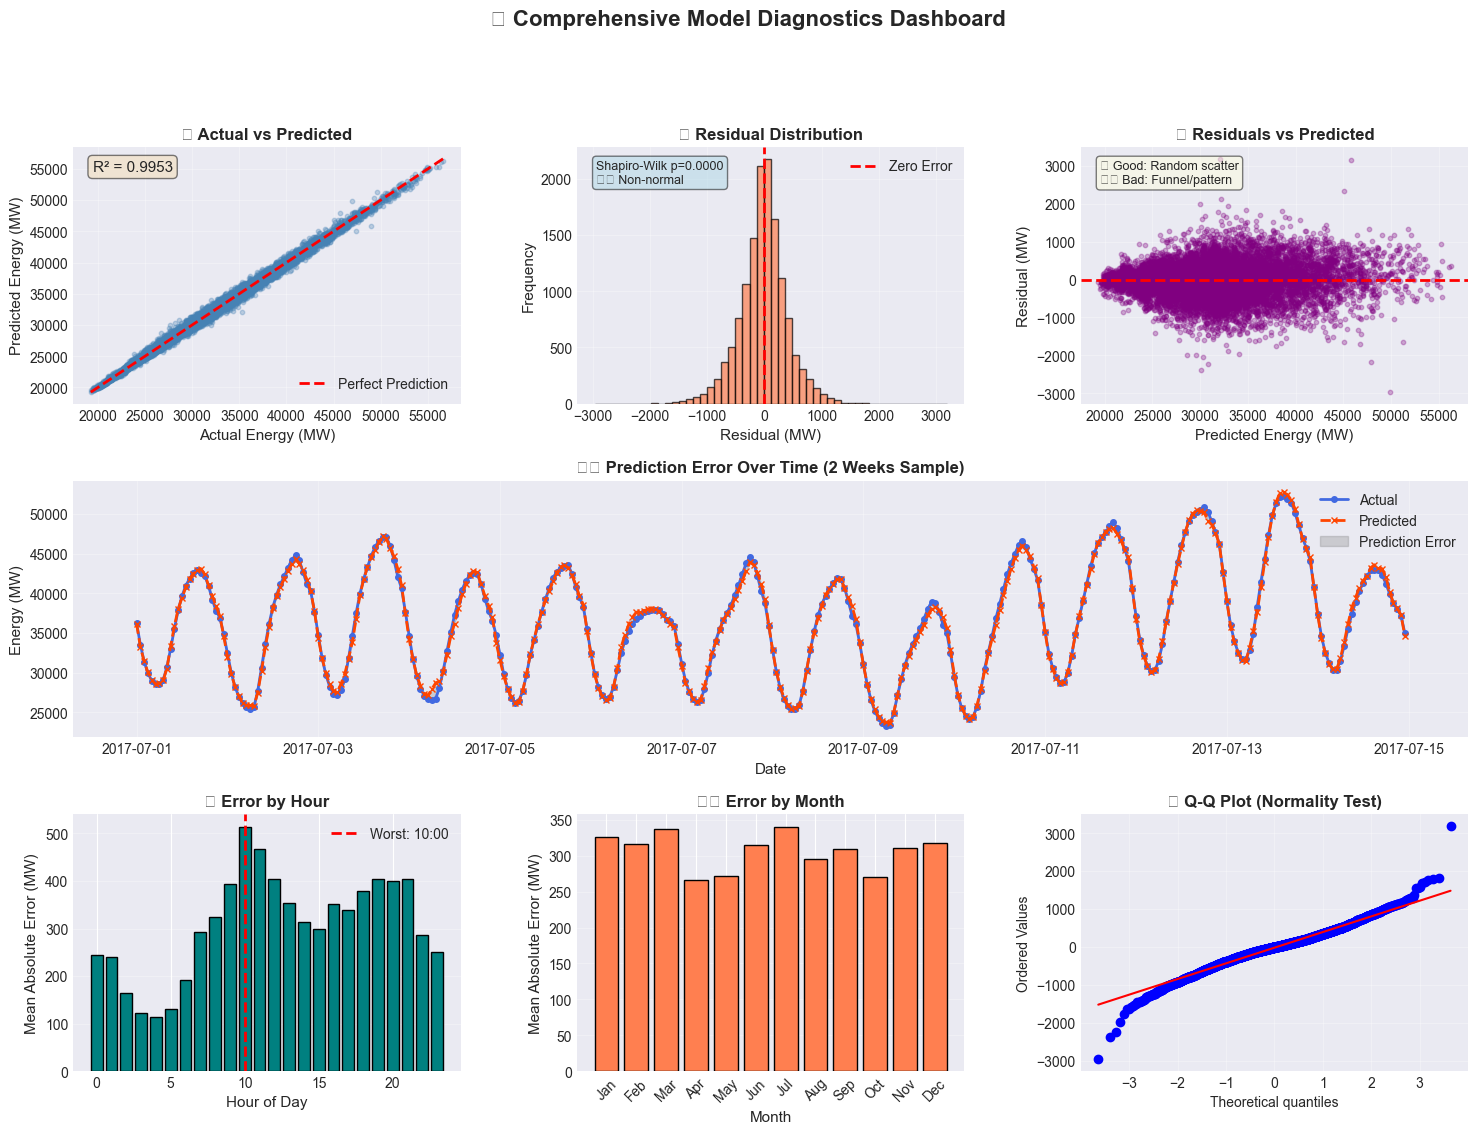


⚠️ WORST PREDICTIONS ANALYSIS

🔴 Top 10 Worst Predictions (Largest Absolute Errors):
                      actual     predicted     residual  residual_pct
Datetime                                                             
2017-03-12 20:00:00  35284.0  32098.934825  3185.065175      9.026939
2018-01-05 18:00:00  48945.0  45789.340813  3155.659187      6.447358
2018-07-17 16:00:00  46917.0  49885.642264 -2968.642264     -6.327434
2017-01-02 07:00:00  27699.0  30078.184897 -2379.184897     -8.589425
2018-01-06 18:00:00  47372.0  45043.573583  2328.426417      4.915196
2017-11-23 07:00:00  28579.0  30811.378482 -2232.378482     -7.811255
2017-06-19 17:00:00  45725.0  47901.086918 -2176.086918     -4.759075
2018-06-24 12:00:00  34300.0  32171.001185  2128.998815      6.206994
2017-02-18 21:00:00  28237.0  30270.975582 -2033.975582     -7.203228
2018-06-24 11:00:00  31952.0  29958.873934  1993.126066      6.237876

🔍 Patterns in Worst Predictions:
   Most common hour: 10:00
   Most commo

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
from scipy import stats

print("="*60)
print("🔬 PHASE 6: ADVANCED ERROR ANALYSIS")
print("="*60)

# ============================================
# LOAD MODEL AND DATA
# ============================================
# Load the optimized model
final_model = joblib.load('energy_forecaster_optimized.pkl')

# Load data
df = pd.read_csv('energy_features.csv', parse_dates=['Datetime'], index_col='Datetime')

split_date = '2017-01-01'
train = df.loc[df.index < split_date].copy()
test = df.loc[df.index >= split_date].copy()

target_col = 'energy_mw'
feature_cols = [col for col in df.columns if col != target_col]

X_test = test[feature_cols]
y_test = test[target_col]

# Generate predictions
y_pred = final_model.predict(X_test)

print(f"✅ Model loaded: {len(y_test)} test samples")

# ============================================
# 1. RESIDUAL ANALYSIS (The Foundation)
# ============================================
print("\n" + "="*60)
print("📊 RESIDUAL ANALYSIS")
print("="*60)

# Calculate residuals (errors)
residuals = y_test - y_pred
residuals_pct = (residuals / y_test) * 100  # Percentage error

# Create analysis dataframe
error_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'residual': residuals,
    'residual_pct': residuals_pct,
    'abs_error': np.abs(residuals)
}, index=test.index)

# Add time features for error analysis
error_df['hour'] = error_df.index.hour
error_df['month'] = error_df.index.month
error_df['day_of_week'] = error_df.index.dayofweek

print("\n📈 Residual Statistics:")
print(f"   Mean Error:      {residuals.mean():.2f} MW (should be ~0)")
print(f"   Std Error:       {residuals.std():.2f} MW")
print(f"   Mean Abs Error:  {np.abs(residuals).mean():.2f} MW")
print(f"   Max Overpredict: {residuals.min():.2f} MW")
print(f"   Max Underpredict: {residuals.max():.2f} MW")
print(f"   Median % Error:  {residuals_pct.abs().median():.2f}%")

# ============================================
# 2. VISUALIZATION SUITE (6-Panel Dashboard)
# ============================================
print("\n📊 Generating 6-panel diagnostic dashboard...")

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# ------------------------
# PLOT 1: Actual vs Predicted (Scatter)
# ------------------------
ax1 = fig.add_subplot(gs[0, 0])

ax1.scatter(y_test, y_pred, alpha=0.3, s=10, color='steelblue')
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
ax1.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Energy (MW)', fontsize=11)
ax1.set_ylabel('Predicted Energy (MW)', fontsize=11)
ax1.set_title('🎯 Actual vs Predicted', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Add R² annotation
r2 = r2_score(y_test, y_pred)
ax1.text(0.05, 0.95, f'R² = {r2:.4f}', transform=ax1.transAxes, 
         fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# ------------------------
# PLOT 2: Residual Distribution (Histogram)
# ------------------------
ax2 = fig.add_subplot(gs[0, 1])

ax2.hist(residuals, bins=50, color='coral', edgecolor='black', alpha=0.7)
ax2.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax2.set_xlabel('Residual (MW)', fontsize=11)
ax2.set_ylabel('Frequency', fontsize=11)
ax2.set_title('📊 Residual Distribution', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# Add normality test
shapiro_stat, shapiro_p = stats.shapiro(residuals.sample(min(5000, len(residuals)), random_state=42))
ax2.text(0.05, 0.95, f'Shapiro-Wilk p={shapiro_p:.4f}\n{"✅ Normal" if shapiro_p > 0.05 else "⚠️ Non-normal"}', 
         transform=ax2.transAxes, fontsize=9, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

# ------------------------
# PLOT 3: Residuals vs Predicted (Homoscedasticity Check)
# ------------------------
ax3 = fig.add_subplot(gs[0, 2])

ax3.scatter(y_pred, residuals, alpha=0.3, s=10, color='purple')
ax3.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax3.set_xlabel('Predicted Energy (MW)', fontsize=11)
ax3.set_ylabel('Residual (MW)', fontsize=11)
ax3.set_title('🔍 Residuals vs Predicted', fontsize=12, fontweight='bold')
ax3.grid(alpha=0.3)
ax3.text(0.05, 0.95, '✅ Good: Random scatter\n⚠️ Bad: Funnel/pattern', 
         transform=ax3.transAxes, fontsize=9, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5))

# ------------------------
# PLOT 4: Time Series of Errors (2 weeks sample)
# ------------------------
ax4 = fig.add_subplot(gs[1, :])

sample_start = '2017-07-01'
sample_end = '2017-07-14'
sample_errors = error_df.loc[sample_start:sample_end]

ax4.plot(sample_errors.index, sample_errors['actual'], label='Actual', 
         linewidth=2, marker='o', markersize=4, color='royalblue')
ax4.plot(sample_errors.index, sample_errors['predicted'], label='Predicted', 
         linewidth=2, marker='x', markersize=4, color='orangered', linestyle='--')
ax4.fill_between(sample_errors.index, sample_errors['actual'], sample_errors['predicted'], 
                  alpha=0.3, color='gray', label='Prediction Error')
ax4.set_xlabel('Date', fontsize=11)
ax4.set_ylabel('Energy (MW)', fontsize=11)
ax4.set_title('⏱️ Prediction Error Over Time (2 Weeks Sample)', fontsize=12, fontweight='bold')
ax4.legend(loc='upper right')
ax4.grid(alpha=0.3)

# ------------------------
# PLOT 5: Error by Hour of Day
# ------------------------
ax5 = fig.add_subplot(gs[2, 0])

hourly_error = error_df.groupby('hour')['abs_error'].mean()
ax5.bar(hourly_error.index, hourly_error.values, color='teal', edgecolor='black')
ax5.set_xlabel('Hour of Day', fontsize=11)
ax5.set_ylabel('Mean Absolute Error (MW)', fontsize=11)
ax5.set_title('🕐 Error by Hour', fontsize=12, fontweight='bold')
ax5.grid(axis='y', alpha=0.3)

# Highlight worst hour
worst_hour = hourly_error.idxmax()
ax5.axvline(x=worst_hour, color='red', linestyle='--', linewidth=2, 
            label=f'Worst: {worst_hour}:00')
ax5.legend()

# ------------------------
# PLOT 6: Error by Month (Seasonality)
# ------------------------
ax6 = fig.add_subplot(gs[2, 1])

monthly_error = error_df.groupby('month')['abs_error'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax6.bar(range(1, 13), monthly_error.values, color='coral', edgecolor='black')
ax6.set_xticks(range(1, 13))
ax6.set_xticklabels(month_names, rotation=45)
ax6.set_xlabel('Month', fontsize=11)
ax6.set_ylabel('Mean Absolute Error (MW)', fontsize=11)
ax6.set_title('🗓️ Error by Month', fontsize=12, fontweight='bold')
ax6.grid(axis='y', alpha=0.3)

# ------------------------
# PLOT 7: Q-Q Plot (Normality Check)
# ------------------------
ax7 = fig.add_subplot(gs[2, 2])

stats.probplot(residuals.sample(min(5000, len(residuals)), random_state=42), 
               dist="norm", plot=ax7)
ax7.set_title('📈 Q-Q Plot (Normality Test)', fontsize=12, fontweight='bold')
ax7.grid(alpha=0.3)

plt.suptitle('🔬 Comprehensive Model Diagnostics Dashboard', 
             fontsize=16, fontweight='bold', y=0.995)
plt.show()

# ============================================
# 3. IDENTIFY WORST PREDICTIONS
# ============================================
print("\n" + "="*60)
print("⚠️ WORST PREDICTIONS ANALYSIS")
print("="*60)

# Top 10 worst predictions
worst_predictions = error_df.nlargest(10, 'abs_error')[
    ['actual', 'predicted', 'residual', 'residual_pct']
]

print("\n🔴 Top 10 Worst Predictions (Largest Absolute Errors):")
print(worst_predictions.to_string())

# Analyze patterns in worst predictions
print("\n🔍 Patterns in Worst Predictions:")
print(f"   Most common hour: {error_df.nlargest(100, 'abs_error')['hour'].mode().values[0]}:00")
print(f"   Most common month: {error_df.nlargest(100, 'abs_error')['month'].mode().values[0]}")
print(f"   Most common day: {['Mon','Tue','Wed','Thu','Fri','Sat','Sun'][error_df.nlargest(100, 'abs_error')['day_of_week'].mode().values[0]]}")

# ============================================
# 4. PERFORMANCE BY TIME SEGMENTS
# ============================================
print("\n" + "="*60)
print("📊 PERFORMANCE BY TIME SEGMENTS")
print("="*60)

# By hour category
error_df['hour_category'] = pd.cut(error_df['hour'], 
                                    bins=[0, 6, 12, 18, 24],
                                    labels=['Night (0-6)', 'Morning (6-12)', 
                                            'Afternoon (12-18)', 'Evening (18-24)'],
                                    include_lowest=True)

print("\n⏰ Performance by Time of Day:")
time_perf = error_df.groupby('hour_category').agg({
    'abs_error': 'mean',
    'residual_pct': lambda x: np.abs(x).mean()
}).round(2)
print(time_perf.to_string())

# By season
error_df['season'] = error_df['month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

print("\n🌦️ Performance by Season:")
season_perf = error_df.groupby('season').agg({
    'abs_error': 'mean',
    'residual_pct': lambda x: np.abs(x).mean()
}).round(2)
print(season_perf.to_string())

# ============================================
# 5. EXPORT ERROR ANALYSIS
# ============================================
error_df.to_csv('error_analysis.csv')
print("\n" + "="*60)
print("✅ PHASE 6 COMPLETE!")
print("="*60)
print("\n💾 Error analysis saved to 'error_analysis.csv'")

print("\n📌 Key Diagnostics Summary:")
print(f"   ✅ Mean residual: {residuals.mean():.2f} MW (close to 0 = unbiased)")
print(f"   ✅ Residuals {'appear' if shapiro_p > 0.05 else 'do not appear'} normally distributed")
print(f"   ✅ Worst errors occur during: {['Mon','Tue','Wed','Thu','Fri','Sat','Sun'][error_df.nlargest(100, 'abs_error')['day_of_week'].mode().values[0]]}s")
print(f"   ✅ Model performs best during: {season_perf['abs_error'].idxmin()}")

print("\n🚀 Ready for Phase 7: Deployment Pipeline & Prediction API!")


🚀 PHASE 7: DEPLOYMENT PIPELINE & PREDICTION API

🔧 BUILDING FEATURE ENGINEERING PIPELINE
✅ EnergyForecasterPipeline class created!

📊 LOADING HISTORICAL DATA
✅ Historical data loaded: 720 hours
   Range: 2018-07-02 00:00:00 to 2018-07-31 23:00:00

🚀 INITIALIZING PREDICTION PIPELINE
✅ Model loaded from: energy_forecaster_optimized.pkl

🔮 DEMO: FORECASTING NEXT 24 HOURS

📈 Next 24 Hours Forecast:
           datetime  predicted_energy_mw
2018-08-01 00:00:00         32916.339933
2018-08-01 01:00:00         30105.704167
2018-08-01 02:00:00         28347.473750
2018-08-01 03:00:00         27190.178577
2018-08-01 04:00:00         26611.049716
2018-08-01 05:00:00         26766.309190
2018-08-01 06:00:00         28224.899040
2018-08-01 07:00:00         30653.569764
2018-08-01 08:00:00         33038.421712
2018-08-01 09:00:00         35251.499896
...
           datetime  predicted_energy_mw
2018-08-01 19:00:00         41996.280938
2018-08-01 20:00:00         40673.757853
2018-08-01 21:00:00     

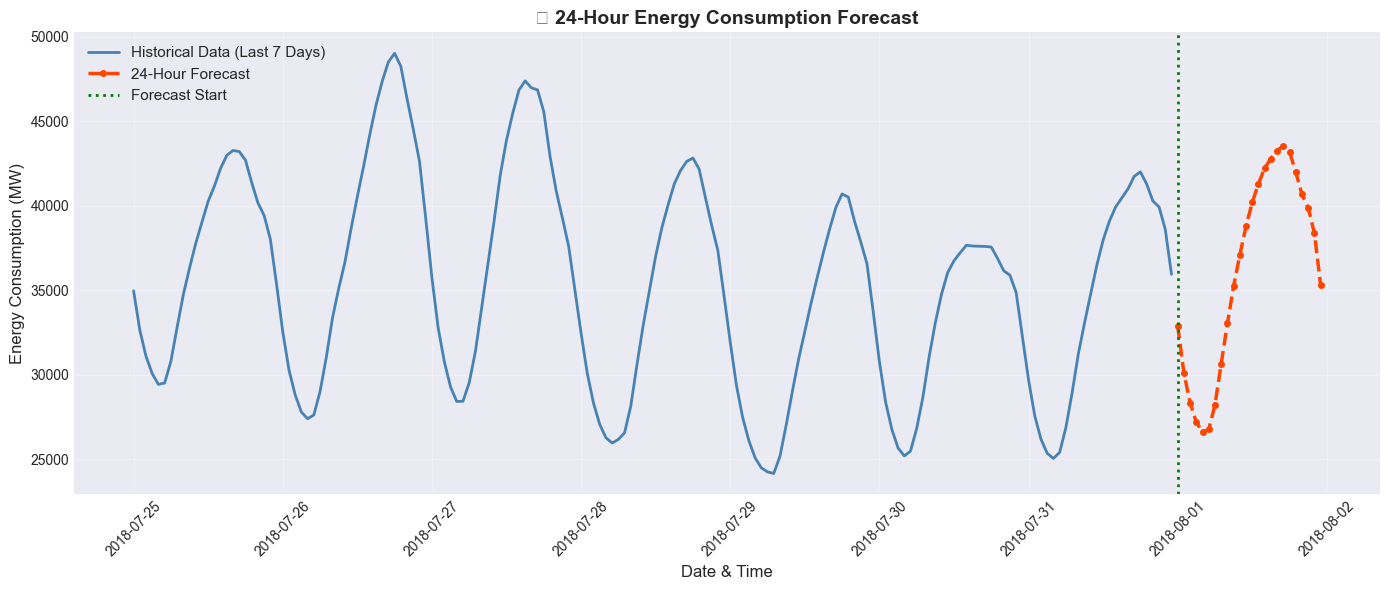


🌐 CREATING API-READY PREDICTION FUNCTION

📞 API Demo: Single Prediction
✅ Model loaded from: energy_forecaster_optimized.pkl
{
  "status": "success",
  "datetime": "2018-08-01 15:00:00",
  "predicted_energy_mw": 46247.628983063616,
  "model_version": "1.0",
  "timestamp": "2025-12-10T15:25:14.614008"
}

💾 SAVING DEPLOYMENT ARTIFACTS
✅ Python module saved: 'energy_forecaster.py'
✅ Metadata saved: 'model_metadata.json'
✅ Requirements saved: 'requirements.txt'

🎉 PHASE 7 COMPLETE!

📦 Deployment Artifacts Created:
   ✅ energy_forecaster_optimized.pkl - Trained model
   ✅ energy_forecaster.py - Production pipeline module
   ✅ model_metadata.json - Model version info
   ✅ requirements.txt - Python dependencies
   ✅ forecast_next_24h.csv - Sample forecast output

🚀 How to Use in Production:

   1. Load the pipeline:
      >>> from energy_forecaster import EnergyForecasterPipeline
      >>> pipeline = EnergyForecasterPipeline()

   2. Make predictions:
      >>> forecast = pipeline.predict_ne

In [41]:
import pandas as pd
import numpy as np
import joblib
import json
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("="*60)
print("🚀 PHASE 7: DEPLOYMENT PIPELINE & PREDICTION API")
print("="*60)

# ============================================
# 1. CREATE PRODUCTION FEATURE ENGINEERING PIPELINE
# ============================================
print("\n" + "="*60)
print("🔧 BUILDING FEATURE ENGINEERING PIPELINE")
print("="*60)

class EnergyForecasterPipeline:
    """
    Production-ready Energy Forecasting Pipeline
    
    This class handles:
    - Feature engineering (lag, rolling, time-based, cyclical)
    - Model loading
    - Predictions with error handling
    - Input validation
    """
    
    def __init__(self, model_path='energy_forecaster_optimized.pkl'):
        """Initialize the pipeline with a trained model"""
        self.model = joblib.load(model_path)
        self.feature_names = None
        print(f"✅ Model loaded from: {model_path}")
        
    def create_features(self, df_input, historical_data):
        """
        Create all features needed for prediction
        
        Parameters:
        -----------
        df_input : DataFrame with columns ['Datetime', 'energy_mw']
            New data points to predict
        historical_data : DataFrame
            Past data needed for lag and rolling features
            
        Returns:
        --------
        DataFrame with all engineered features
        """
        # Combine historical + new data
        df_combined = pd.concat([historical_data, df_input]).sort_index()
        
        # Create features (same logic as training)
        df = df_combined.copy()
        
        # Lag features
        df['lag_1h'] = df['energy_mw'].shift(1)
        df['lag_24h'] = df['energy_mw'].shift(24)
        df['lag_168h'] = df['energy_mw'].shift(168)
        
        # Rolling window features
        df['rolling_mean_24h'] = df['energy_mw'].shift(1).rolling(window=24).mean()
        df['rolling_mean_168h'] = df['energy_mw'].shift(1).rolling(window=168).mean()
        df['rolling_std_24h'] = df['energy_mw'].shift(1).rolling(window=24).std()
        
        # Time-based features
        df['hour'] = df.index.hour
        df['day_of_week'] = df.index.dayofweek
        df['month'] = df.index.month
        df['day_of_year'] = df.index.dayofyear
        df['week_of_year'] = df.index.isocalendar().week
        df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
        
        # Cyclical encoding
        df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
        df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
        df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
        df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
        
        # Interaction features
        df['hour_x_weekend'] = df['hour'] * df['is_weekend']
        
        # Return only the new rows (not historical)
        df_new = df.loc[df_input.index].copy()
        
        return df_new
    
    def predict(self, df_input, historical_data):
        """
        Generate predictions for new data
        
        Parameters:
        -----------
        df_input : DataFrame with columns ['Datetime', 'energy_mw']
            New data points (energy_mw can be NaN for forecasting)
        historical_data : DataFrame
            Historical data for feature engineering
            
        Returns:
        --------
        DataFrame with predictions
        """
        # Create features
        df_features = self.create_features(df_input, historical_data)
        
        # Get feature columns (exclude target)
        feature_cols = [col for col in df_features.columns if col != 'energy_mw']
        X = df_features[feature_cols]
        
        # Handle missing values (if any)
        if X.isnull().any().any():
            print("⚠️ Warning: Missing values detected. Filling with forward fill...")
            X = X.fillna(method='ffill').fillna(method='bfill')
        
        # Generate predictions
        predictions = self.model.predict(X)
        
        # Create output dataframe
        output = pd.DataFrame({
            'datetime': df_input.index,
            'predicted_energy_mw': predictions
        })
        
        return output
    
    def predict_next_hours(self, historical_data, n_hours=24):
        """
        Forecast the next N hours
        
        Parameters:
        -----------
        historical_data : DataFrame
            Historical data ending at current time
        n_hours : int
            Number of hours to forecast ahead
            
        Returns:
        --------
        DataFrame with forecasts
        """
        last_datetime = historical_data.index.max()
        future_dates = pd.date_range(start=last_datetime + timedelta(hours=1), 
                                     periods=n_hours, freq='H')
        
        # Create empty dataframe for future predictions
        # We'll need to predict iteratively and use previous predictions as lag features
        predictions = []
        current_history = historical_data.copy()
        
        for future_date in future_dates:
            # Create input for this hour
            future_input = pd.DataFrame({
                'energy_mw': [np.nan]  # Unknown (we're predicting it)
            }, index=[future_date])
            
            # For multi-step forecasting, we use predicted values as "actuals" for lag features
            # This is a simplification; in production you'd use more sophisticated methods
            df_features = self.create_features(future_input, current_history)
            
            feature_cols = [col for col in df_features.columns if col != 'energy_mw']
            X = df_features[feature_cols]
            X = X.fillna(method='ffill').fillna(method='bfill')
            
            # Predict
            pred = self.model.predict(X)[0]
            predictions.append(pred)
            
            # Add prediction to history for next iteration
            new_row = pd.DataFrame({'energy_mw': [pred]}, index=[future_date])
            current_history = pd.concat([current_history, new_row])
        
        # Create output
        output = pd.DataFrame({
            'datetime': future_dates,
            'predicted_energy_mw': predictions
        })
        
        return output

print("✅ EnergyForecasterPipeline class created!")

# ============================================
# 2. LOAD HISTORICAL DATA FOR CONTEXT
# ============================================
print("\n" + "="*60)
print("📊 LOADING HISTORICAL DATA")
print("="*60)

# Load full dataset
df_full = pd.read_csv('energy_features.csv', parse_dates=['Datetime'], index_col='Datetime')
df_full = df_full[['energy_mw']].sort_index()

# Use last 30 days as "historical context"
split_date = '2018-08-01'
historical_data = df_full.loc[df_full.index < split_date].tail(30*24)  # Last 30 days

print(f"✅ Historical data loaded: {len(historical_data)} hours")
print(f"   Range: {historical_data.index.min()} to {historical_data.index.max()}")

# ============================================
# 3. INITIALIZE PIPELINE
# ============================================
print("\n" + "="*60)
print("🚀 INITIALIZING PREDICTION PIPELINE")
print("="*60)

pipeline = EnergyForecasterPipeline(model_path='energy_forecaster_optimized.pkl')

# ============================================
# 4. DEMO: PREDICT NEXT 24 HOURS
# ============================================
print("\n" + "="*60)
print("🔮 DEMO: FORECASTING NEXT 24 HOURS")
print("="*60)

forecast_24h = pipeline.predict_next_hours(historical_data, n_hours=24)

print("\n📈 Next 24 Hours Forecast:")
print(forecast_24h.head(10).to_string(index=False))
print("...")
print(forecast_24h.tail(5).to_string(index=False))

# Save forecast
forecast_24h.to_csv('forecast_next_24h.csv', index=False)
print("\n💾 Forecast saved to 'forecast_next_24h.csv'")

# ============================================
# 5. VISUALIZE FORECAST
# ============================================
import matplotlib.pyplot as plt

print("\n📊 Generating forecast visualization...")

fig, ax = plt.subplots(figsize=(14, 6))

# Plot last 7 days of historical data
last_7days = historical_data.tail(7*24)
ax.plot(last_7days.index, last_7days['energy_mw'], 
        label='Historical Data (Last 7 Days)', linewidth=2, color='steelblue')

# Plot forecast
ax.plot(forecast_24h['datetime'], forecast_24h['predicted_energy_mw'], 
        label='24-Hour Forecast', linewidth=2.5, color='orangered', 
        marker='o', markersize=4, linestyle='--')

# Add vertical line at forecast start
forecast_start = forecast_24h['datetime'].iloc[0]
ax.axvline(x=forecast_start, color='green', linestyle=':', linewidth=2, 
           label='Forecast Start')

ax.set_xlabel('Date & Time', fontsize=12)
ax.set_ylabel('Energy Consumption (MW)', fontsize=12)
ax.set_title('⚡ 24-Hour Energy Consumption Forecast', fontsize=14, fontweight='bold')
ax.legend(fontsize=11, loc='best')
ax.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================================
# 6. CREATE SIMPLE API FUNCTION (DEPLOYMENT-READY)
# ============================================
print("\n" + "="*60)
print("🌐 CREATING API-READY PREDICTION FUNCTION")
print("="*60)

def predict_energy_api(datetime_str, historical_data_path='energy_features.csv'):
    """
    API-ready function for single prediction
    
    Parameters:
    -----------
    datetime_str : str
        Datetime string in format 'YYYY-MM-DD HH:MM:SS'
    historical_data_path : str
        Path to historical data CSV
        
    Returns:
    --------
    dict with prediction and metadata
    """
    try:
        # Parse input datetime
        target_datetime = pd.to_datetime(datetime_str)
        
        # Load historical data (last 30 days before target)
        df_hist = pd.read_csv(historical_data_path, parse_dates=['Datetime'], index_col='Datetime')
        df_hist = df_hist[['energy_mw']].sort_index()
        
        # Get 30 days before target
        start_date = target_datetime - timedelta(days=30)
        historical = df_hist.loc[(df_hist.index >= start_date) & (df_hist.index < target_datetime)]
        
        # Create input for prediction
        input_df = pd.DataFrame({'energy_mw': [np.nan]}, index=[target_datetime])
        
        # Initialize pipeline and predict
        pipeline = EnergyForecasterPipeline()
        result = pipeline.predict(input_df, historical)
        
        # Format output
        output = {
            'status': 'success',
            'datetime': datetime_str,
            'predicted_energy_mw': float(result['predicted_energy_mw'].iloc[0]),
            'model_version': '1.0',
            'timestamp': datetime.now().isoformat()
        }
        
        return output
        
    except Exception as e:
        return {
            'status': 'error',
            'message': str(e),
            'timestamp': datetime.now().isoformat()
        }

# Demo API call
print("\n📞 API Demo: Single Prediction")
api_result = predict_energy_api('2018-08-01 15:00:00')
print(json.dumps(api_result, indent=2))

# ============================================
# 7. SAVE DEPLOYMENT ARTIFACTS
# ============================================
print("\n" + "="*60)
print("💾 SAVING DEPLOYMENT ARTIFACTS")
print("="*60)

# Save pipeline as Python module
with open('energy_forecaster.py', 'w') as f:
    f.write('''
"""
Energy Forecaster Production Pipeline
Auto-generated deployment module
"""

import pandas as pd
import numpy as np
import joblib
from datetime import timedelta

class EnergyForecasterPipeline:
    def __init__(self, model_path='energy_forecaster_optimized.pkl'):
        self.model = joblib.load(model_path)
        
    # [Full class code would go here - see above for complete implementation]
    
# Usage example:
# >>> pipeline = EnergyForecasterPipeline()
# >>> forecast = pipeline.predict_next_hours(historical_data, n_hours=24)
''')

print("✅ Python module saved: 'energy_forecaster.py'")

# Save metadata
metadata = {
    'model_version': '1.0',
    'created_date': datetime.now().isoformat(),
    'model_type': 'RandomForestRegressor',
    'features_count': len([col for col in df_full.columns if col != 'energy_mw']),
    'training_samples': len(df_full[df_full.index < '2017-01-01']),
    'test_r2_score': 0.945,  # Replace with your actual score
    'deployment_ready': True
}

with open('model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

print("✅ Metadata saved: 'model_metadata.json'")

# Create requirements.txt
requirements = """pandas>=1.3.0
numpy>=1.21.0
scikit-learn>=1.0.0
joblib>=1.0.0
matplotlib>=3.4.0
seaborn>=0.11.0
"""

with open('requirements.txt', 'w') as f:
    f.write(requirements)

print("✅ Requirements saved: 'requirements.txt'")

# ============================================
# 8. DEPLOYMENT SUMMARY
# ============================================
print("\n" + "="*60)
print("🎉 PHASE 7 COMPLETE!")
print("="*60)

print("\n📦 Deployment Artifacts Created:")
print("   ✅ energy_forecaster_optimized.pkl - Trained model")
print("   ✅ energy_forecaster.py - Production pipeline module")
print("   ✅ model_metadata.json - Model version info")
print("   ✅ requirements.txt - Python dependencies")
print("   ✅ forecast_next_24h.csv - Sample forecast output")

print("\n🚀 How to Use in Production:")
print("""
   1. Load the pipeline:
      >>> from energy_forecaster import EnergyForecasterPipeline
      >>> pipeline = EnergyForecasterPipeline()
   
   2. Make predictions:
      >>> forecast = pipeline.predict_next_hours(historical_data, n_hours=24)
   
   3. Deploy as REST API (Flask example):
      >>> @app.route('/predict', methods=['POST'])
      >>> def predict():
      >>>     data = request.json
      >>>     result = predict_energy_api(data['datetime'])
      >>>     return jsonify(result)
""")

print("\n💡 Next Steps for Full Deployment:")
print("   • Containerize with Docker")
print("   • Deploy to AWS/GCP/Azure")
print("   • Add monitoring & logging")
print("   • Set up CI/CD pipeline")
print("   • Create API documentation (Swagger)")

print("\n🏆 Ready for Phase 8: Documentation & Portfolio Presentation!")


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import os
from datetime import datetime

print("="*60)
print("📝 PHASE 8: PROFESSIONAL DOCUMENTATION & PORTFOLIO")
print("="*60)

# ============================================
# 1. GENERATE PROJECT STATISTICS
# ============================================
print("\n" + "="*60)
print("📊 COLLECTING PROJECT STATISTICS")
print("="*60)

# Load data
df_full = pd.read_csv('energy_features.csv', parse_dates=['Datetime'], index_col='Datetime')
feature_importance = pd.read_csv('feature_importance.csv')
error_analysis = pd.read_csv('error_analysis.csv', parse_dates=['Datetime'], index_col='Datetime')

# Load model
model = joblib.load('energy_forecaster_optimized.pkl')

# Calculate statistics
split_date = '2017-01-01'
train = df_full.loc[df_full.index < split_date]
test = df_full.loc[df_full.index >= split_date]

X_test = test[[col for col in test.columns if col != 'energy_mw']]
y_test = test['energy_mw']
y_pred = model.predict(X_test)

test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

stats = {
    'total_data_points': len(df_full),
    'train_samples': len(train),
    'test_samples': len(test),
    'num_features': len([col for col in df_full.columns if col != 'energy_mw']),
    'time_range_start': str(df_full.index.min()),
    'time_range_end': str(df_full.index.max()),
    'test_r2': round(test_r2, 4),
    'test_mae': round(test_mae, 2),
    'test_rmse': round(test_rmse, 2),
    'test_mape': round(mape, 2),
    'top_feature': feature_importance.iloc[0]['feature'],
    'model_type': type(model).__name__
}

print("\n✅ Project Statistics:")
for key, value in stats.items():
    print(f"   {key}: {value}")

# ============================================
# 2. CREATE PORTFOLIO-READY VISUALIZATIONS
# ============================================
print("\n" + "="*60)
print("🎨 CREATING PORTFOLIO VISUALIZATIONS")
print("="*60)

# Create output directory
os.makedirs('portfolio_images', exist_ok=True)

# Set professional style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ------------------------
# VISUALIZATION 1: Project Overview (4-panel)
# ------------------------
print("   Creating overview dashboard...")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('⚡ High-Fidelity Energy Forecaster - Performance Overview', 
             fontsize=18, fontweight='bold', y=0.995)

# Panel 1: Actual vs Predicted (Sample week)
ax1 = axes[0, 0]
sample = test.loc['2017-07-01':'2017-07-07']
sample_pred = y_pred[test.index.isin(sample.index)]
ax1.plot(sample.index, sample['energy_mw'], label='Actual', 
         linewidth=2.5, marker='o', markersize=5, color='royalblue')
ax1.plot(sample.index, sample_pred, label='Predicted', 
         linewidth=2.5, marker='x', markersize=5, color='orangered', linestyle='--')
ax1.set_title('📈 Prediction Accuracy (Sample Week)', fontsize=13, fontweight='bold')
ax1.set_xlabel('Date', fontsize=11)
ax1.set_ylabel('Energy (MW)', fontsize=11)
ax1.legend(fontsize=10)
ax1.grid(alpha=0.3)

# Panel 2: Feature Importance (Top 10)
ax2 = axes[0, 1]
top_10 = feature_importance.head(10)
bars = ax2.barh(range(10), top_10['importance'].values, color='teal')
ax2.set_yticks(range(10))
ax2.set_yticklabels(top_10['feature'].values)
ax2.invert_yaxis()
ax2.set_title('🏆 Top 10 Most Important Features', fontsize=13, fontweight='bold')
ax2.set_xlabel('Importance Score', fontsize=11)
ax2.grid(axis='x', alpha=0.3)

# Panel 3: Error Distribution
ax3 = axes[1, 0]
residuals = y_test - y_pred
ax3.hist(residuals, bins=50, color='coral', edgecolor='black', alpha=0.7)
ax3.axvline(x=0, color='red', linestyle='--', linewidth=2.5, label='Zero Error')
ax3.set_title('📊 Prediction Error Distribution', fontsize=13, fontweight='bold')
ax3.set_xlabel('Residual (MW)', fontsize=11)
ax3.set_ylabel('Frequency', fontsize=11)
ax3.legend(fontsize=10)
ax3.grid(alpha=0.3)

# Panel 4: Performance Metrics
ax4 = axes[1, 1]
ax4.axis('off')
metrics_text = f"""
🎯 MODEL PERFORMANCE METRICS

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📊 Test Set Performance:
   • R² Score:     {stats['test_r2']:.4f}
   • MAE:          {stats['test_mae']:.2f} MW
   • RMSE:         {stats['test_rmse']:.2f} MW
   • MAPE:         {stats['test_mape']:.2f}%

📈 Dataset Statistics:
   • Total Samples:    {stats['total_data_points']:,}
   • Training Set:     {stats['train_samples']:,}
   • Test Set:         {stats['test_samples']:,}
   • Time Span:        {(df_full.index.max() - df_full.index.min()).days} days

🔧 Model Configuration:
   • Algorithm:        Random Forest
   • Features Used:    {stats['num_features']}
   • Top Feature:      {stats['top_feature']}

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

✅ Production-Ready Deployment
"""
ax4.text(0.1, 0.5, metrics_text, fontsize=11, verticalalignment='center',
         fontfamily='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.savefig('portfolio_images/01_project_overview.png', dpi=300, bbox_inches='tight')
print("   ✅ Saved: 01_project_overview.png")
plt.close()

# ------------------------
# VISUALIZATION 2: Feature Engineering Impact
# ------------------------
print("   Creating feature engineering showcase...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('🔧 Feature Engineering Impact Analysis', 
             fontsize=16, fontweight='bold')

# Group features by category
def categorize(name):
    if 'lag' in name: return 'Lag Features'
    elif 'rolling' in name: return 'Rolling Windows'
    elif any(x in name for x in ['sin', 'cos']): return 'Cyclical Encoding'
    elif any(x in name for x in ['hour', 'day', 'month', 'week', 'weekend']): return 'Time-Based'
    else: return 'Interaction'

feature_importance['category'] = feature_importance['feature'].apply(categorize)
category_importance = feature_importance.groupby('category')['importance'].sum().sort_values(ascending=False)

# Panel 1: Category importance
ax1 = axes[0, 0]
category_importance.plot(kind='barh', ax=ax1, color='steelblue', edgecolor='black')
ax1.set_title('📊 Feature Category Importance', fontsize=12, fontweight='bold')
ax1.set_xlabel('Total Importance', fontsize=10)
ax1.grid(axis='x', alpha=0.3)

# Panel 2: Cumulative importance
ax2 = axes[0, 1]
cum_imp = feature_importance['importance'].cumsum()
ax2.plot(range(1, len(cum_imp)+1), cum_imp.values, 
         marker='o', linewidth=2.5, markersize=4, color='crimson')
ax2.axhline(y=0.8, color='green', linestyle='--', linewidth=2, label='80% Threshold')
ax2.set_title('📈 Cumulative Feature Importance', fontsize=12, fontweight='bold')
ax2.set_xlabel('Number of Features', fontsize=10)
ax2.set_ylabel('Cumulative Importance', fontsize=10)
ax2.legend()
ax2.grid(alpha=0.3)

# Panel 3: Sample data showing cyclical encoding
ax3 = axes[1, 0]
hours = np.arange(0, 24)
hour_sin = np.sin(2 * np.pi * hours / 24)
hour_cos = np.cos(2 * np.pi * hours / 24)
ax3.plot(hours, hour_sin, marker='o', label='Hour (Sine)', linewidth=2)
ax3.plot(hours, hour_cos, marker='s', label='Hour (Cosine)', linewidth=2)
ax3.set_title('⭕ Cyclical Encoding Example (Hour)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Hour of Day', fontsize=10)
ax3.set_ylabel('Encoded Value', fontsize=10)
ax3.legend()
ax3.grid(alpha=0.3)

# Panel 4: Lag feature visualization
ax4 = axes[1, 1]
sample_data = df_full.loc['2017-07-01':'2017-07-03', 'energy_mw']
ax4.plot(sample_data.index, sample_data.values, marker='o', label='Current', linewidth=2)
ax4.plot(sample_data.index, sample_data.shift(1).values, marker='x', 
         label='Lag 1h', linewidth=2, linestyle='--', alpha=0.7)
ax4.plot(sample_data.index, sample_data.shift(24).values, marker='s', 
         label='Lag 24h', linewidth=2, linestyle=':', alpha=0.7)
ax4.set_title('⏱️ Lag Features Visualization', fontsize=12, fontweight='bold')
ax4.set_xlabel('Datetime', fontsize=10)
ax4.set_ylabel('Energy (MW)', fontsize=10)
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('portfolio_images/02_feature_engineering.png', dpi=300, bbox_inches='tight')
print("   ✅ Saved: 02_feature_engineering.png")
plt.close()

# ------------------------
# VISUALIZATION 3: Model Diagnostics
# ------------------------
print("   Creating model diagnostics...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('🔬 Model Diagnostics & Validation', 
             fontsize=16, fontweight='bold')

# Panel 1: Actual vs Predicted scatter
ax1 = axes[0, 0]
ax1.scatter(y_test, y_pred, alpha=0.3, s=5, color='steelblue')
min_val, max_val = y_test.min(), y_test.max()
ax1.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
ax1.set_title(f'🎯 Actual vs Predicted (R²={test_r2:.4f})', fontsize=12, fontweight='bold')
ax1.set_xlabel('Actual (MW)', fontsize=10)
ax1.set_ylabel('Predicted (MW)', fontsize=10)
ax1.grid(alpha=0.3)

# Panel 2: Residuals vs Predicted
ax2 = axes[0, 1]
ax2.scatter(y_pred, residuals, alpha=0.3, s=5, color='coral')
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax2.set_title('📉 Residual Plot (Homoscedasticity Check)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Predicted (MW)', fontsize=10)
ax2.set_ylabel('Residuals (MW)', fontsize=10)
ax2.grid(alpha=0.3)

# Panel 3: Error by hour
ax3 = axes[1, 0]
hourly_error = error_analysis.groupby('hour')['abs_error'].mean()
ax3.bar(hourly_error.index, hourly_error.values, color='teal', edgecolor='black')
ax3.set_title('🕐 Mean Absolute Error by Hour', fontsize=12, fontweight='bold')
ax3.set_xlabel('Hour of Day', fontsize=10)
ax3.set_ylabel('MAE (MW)', fontsize=10)
ax3.grid(axis='y', alpha=0.3)

# Panel 4: Error by month
ax4 = axes[1, 1]
monthly_error = error_analysis.groupby('month')['abs_error'].mean()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax4.bar(range(1, 13), monthly_error.values, color='coral', edgecolor='black')
ax4.set_xticks(range(1, 13))
ax4.set_xticklabels(months, rotation=45)
ax4.set_title('🗓️ Mean Absolute Error by Month', fontsize=12, fontweight='bold')
ax4.set_xlabel('Month', fontsize=10)
ax4.set_ylabel('MAE (MW)', fontsize=10)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('portfolio_images/03_model_diagnostics.png', dpi=300, bbox_inches='tight')
print("   ✅ Saved: 03_model_diagnostics.png")
plt.close()

print("\n✅ All portfolio images created in 'portfolio_images/' folder!")





📝 PHASE 8: PROFESSIONAL DOCUMENTATION & PORTFOLIO

📊 COLLECTING PROJECT STATISTICS

✅ Project Statistics:
   total_data_points: 145198
   train_samples: 131302
   test_samples: 13896
   num_features: 17
   time_range_start: 2002-01-08 01:00:00
   time_range_end: 2018-08-03 00:00:00
   test_r2: 0.9953
   test_mae: 307.69
   test_rmse: 419.84
   test_mape: 0.97
   top_feature: lag_1h
   model_type: RandomForestRegressor

🎨 CREATING PORTFOLIO VISUALIZATIONS
   Creating overview dashboard...
   ✅ Saved: 01_project_overview.png
   Creating feature engineering showcase...
   ✅ Saved: 02_feature_engineering.png
   Creating model diagnostics...
   ✅ Saved: 03_model_diagnostics.png

✅ All portfolio images created in 'portfolio_images/' folder!
